## **House Price Prediction end to end App**
This note book cover the following concepts

1. Regression Models using Scikit Learn
2. Model Evaluation

In [1]:
# Import necessary libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

# Set random seed for reproducibility
np.random.seed(42)

print("All libraries imported successfully.")


All libraries imported successfully.


### **TRAINING DATA PRE-PROCESSING**
The first step in the machine learning pipeline is to clean and transform the training data into a useable format for analysis and modeling.   

As such, data pre-processing addresses:
- Assumptions about data shape
- Incorrect data types
- Outliers or errors
- Missing values
- Categorical variables

# **Loading The Dataset**

In [2]:
# Loading The Dataset 
full_data = pd.read_csv("USA_Housing.csv")
print("Data loaded successfully.")

Data loaded successfully.


In [3]:
print(f"Features(X) shape:{full_data.shape}")
print(f"Features (X) Data Types:{full_data.dtypes}")
print (f"Features(X) Missing Values: { full_data.isnull().sum()}")
print("\nDataset description:")

Features(X) shape:(5000, 7)
Features (X) Data Types:Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object
Features(X) Missing Values: Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

Dataset description:


**Missing Data**  
 A heatmap will help better visualize what features as missing the most information.

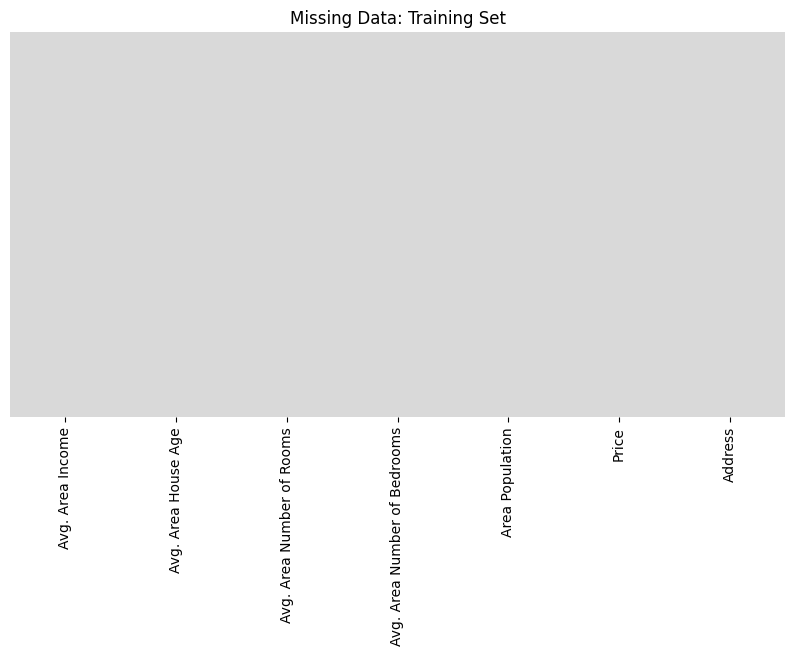

In [4]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

In [5]:
full_data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [6]:
# Remove Address feature
full_data.drop('Address', axis = 1, inplace = True)

In [7]:
# Remove rows with missing data
full_data.dropna(inplace = True)

In [8]:
full_data.columns = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AvePop', 'Price']
print(f"Columns names updates: {full_data.columns}")
print("Data cleaned successfully.")

Columns names updates: Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AvePop', 'Price'], dtype='object')
Data cleaned successfully.


## **OBJECTIVE 2: MACHINE LEARNING**
Next, I will feed these features into various classification algorithms to determine the best performance using a simple framework: **Split, Fit, Predict, Score It.**

## **Target Variable Splitting**
We will spilt the Full dataset into **Input** and **target** variables

Input is also called **Feature Variables**
Output referes to Target **variables**

In [9]:
# Split data to be used in the models
# Create matrix of features
x = full_data.drop('Price', axis = 1) # grabs everything else but 'Price'

# Create target variable
y = full_data['Price'] # y is the column we're trying to predict


In [10]:
#Basic Statistics
print("\nTarget variable statistics:")
print(f"\nMeean house value: ${y.mean():.2f}( in hundreds of thousands)")
print(f"\nMedian house value: ${y.median():.2f}( in hundreds of thousands)")
print(f"\nMin house value: ${y.min():.2f}( in hundreds of thousands)")
print(f"\nMax house value: ${y.max():.2f}( in hundreds of thousands)")




Target variable statistics:

Meean house value: $1232072.65( in hundreds of thousands)

Median house value: $1232669.38( in hundreds of thousands)

Min house value: $15938.66( in hundreds of thousands)

Max house value: $2469065.59( in hundreds of thousands)


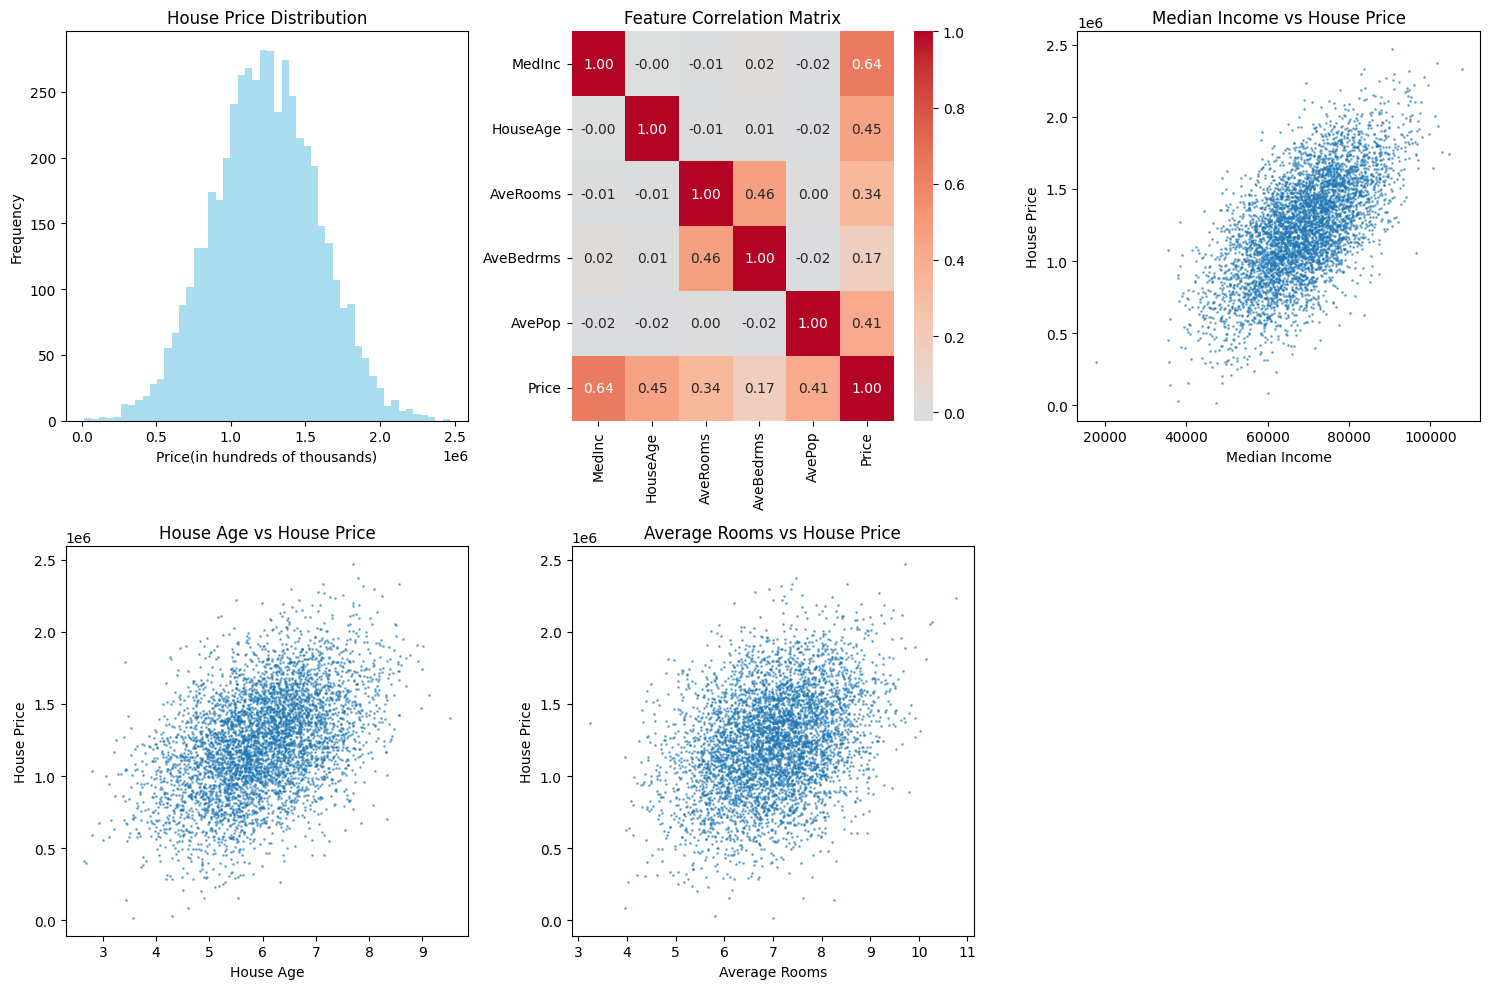

In [11]:
# create Visulization
plt.figure(figsize=(15, 10))

# Distribution of Target Variable
plt.subplot(2, 3, 1)
plt.hist(y, bins=50 , alpha=0.7 , color='skyblue')
plt.title('House Price Distribution')
plt.xlabel('Price(in hundreds of thousands)')
plt.ylabel('Frequency')

# Correlation heatmap
plt.subplot(2, 3, 2)
correlation_matrix = full_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title('Feature Correlation Matrix')

# Scatter plot: MedInc vs House Price
plt.subplot(2, 3, 3)
plt.scatter(full_data['MedInc'], y, alpha=0.5, s=1)
plt.title('Median Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')

# Scatter plot: HouseAge vs Price
plt.subplot(2,3,4)
plt.scatter(full_data['HouseAge'], y, alpha=0.5, s=1)
plt.title('House Age vs House Price')
plt.xlabel('House Age')
plt.ylabel('House Price')

# Scatter plot: AveRooms vs House Price
plt.subplot(2, 3, 5)
plt.scatter(full_data['AveRooms'], y, alpha=0.5, s=1)
plt.title('Average Rooms vs House Price')
plt.xlabel('Average Rooms')
plt.ylabel('House Price')


plt.tight_layout()
plt.show()

In [12]:
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(x)
x_transform = pre_process.fit_transform(x)

In [13]:
# x Represents the Features
x_transform.shape
x_transform

array([[ 1.02865969, -0.29692705,  0.02127433,  0.08806222, -1.31759867],
       [ 1.00080775,  0.02590164, -0.25550611, -0.72230146,  0.40399945],
       [-0.68462916, -0.11230283,  1.5162435 ,  0.93084045,  0.07240989],
       ...,
       [-0.48723454,  1.28447022, -2.17026949, -1.50025059, -0.29193658],
       [-0.05459152, -0.44669439,  0.14154061,  1.18205319,  0.65111608],
       [-0.28831272,  0.01521477, -0.19434166,  0.07185495,  1.04162464]],
      shape=(5000, 5))

In [14]:
y # y represents the Target
y.shape

(5000,)

In [15]:
# Split the data into training and testing sets ( 80% training, 20% testing )
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print("Data split completed")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print(f"\nTraining set: {len(X_train)} samples({len(y_train)/len(x)*100:1f}%)")
print(f"Testing set: {len(X_test)} samples({len(y_test)/len(x)*100:1f}%)")


Data split completed
X_train shape: (4000, 5)
X_test shape: (1000, 5)
y_train shape: (4000,)
y_test shape: (1000,)

Training set: 4000 samples(80.000000%)
Testing set: 1000 samples(20.000000%)


In [39]:
# Scale the feature using StandardScaler
# This is important for linear regression to ensure all features contain equally
scaler = StandardScaler()
# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

print("Feature scaling completed")
print(f"\nOriginal X_train statistics:")
print(f"Mean: {X_train.mean().mean():3f}")
print(f"Std: {X_train.std().mean():3f}")

print (f"\nScaled X_train statistics:")
print(f"Mean: {X_train_scaled.mean():3f}")
print(f"Std: {X_train_scaled.mean():3f}")

Feature scaling completed

Original X_train statistics:
Mean: 20940.891174
Std: 4135.627709

Scaled X_train statistics:
Mean: -0.000000
Std: -0.000000


# **Model Training**

## **Linear Regression Models**

We will a Linear Regression model from scikit-learn. Linear Regressionis a good starting point to regression tasks
and provide interpretable results.

In [17]:
# Fit
# Create instance of model
lin_reg = LinearRegression()

# Pass training data into model
lin_reg.fit(X_train, y_train)
# pipe = make_pipeline(StandardScaler(), LinearRegression())
# pipe.fit(x_train, y_train

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [40]:
# Initialize the Linear Regression model
model = LinearRegression()

print("Training the Linear regression model....")

# Train the model
model.fit(X_train_scaled, y_train)

print("Model Training completed!")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.4f}")


Training the Linear regression model....
Model Training completed!
Model coefficients: [231741.87665217 163580.77656614 120724.77138745   2992.44913541
 152235.90009699]
Model intercept: 1229576.9926


# **7.Model Evalution**

Let's evaluteour trained model on the both training and test sets to inderstand its performance.

In [44]:
# Make prediction on both training and test set
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Calculate the mean squared error for both training and test set
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Model Evaluation Results:")
print("=" * 40)
print(f"\nTraing Set:")
print(f" Mean Squared Error: {train_mse:.4f}")
print( f" Root Mean Squre Error:{np.sqrt(train_mse):.4}")
print(f" R2 score :{train_r2:.4f}")

print(f"\nTest Set:")
print(f" Mean Squared Error: {test_mse:.4f}")
print(f" Root Mean Squared Error: {np.sqrt(test_mse):.4f}")
print(f" R2 score :{test_r2:.4f}")



print(f"\nModel Performance Summary:")
print(f"\nThe model explains{test_r2*100:1f}% of the variancein house prices.")
print(f"\nAverage prediction error : ${np.sqrt(test_mse)*100:.0f}k")


Model Evaluation Results:

Traing Set:
 Mean Squared Error: 10256318867.4827
 Root Mean Squre Error:1.013e+05
 R2 score :0.9180

Test Set:
 Mean Squared Error: 10089009300.8940
 Root Mean Squared Error: 100444.0606
 R2 score :0.9180

Model Performance Summary:

The model explains91.799717% of the variancein house prices.

Average prediction error : $10044406k


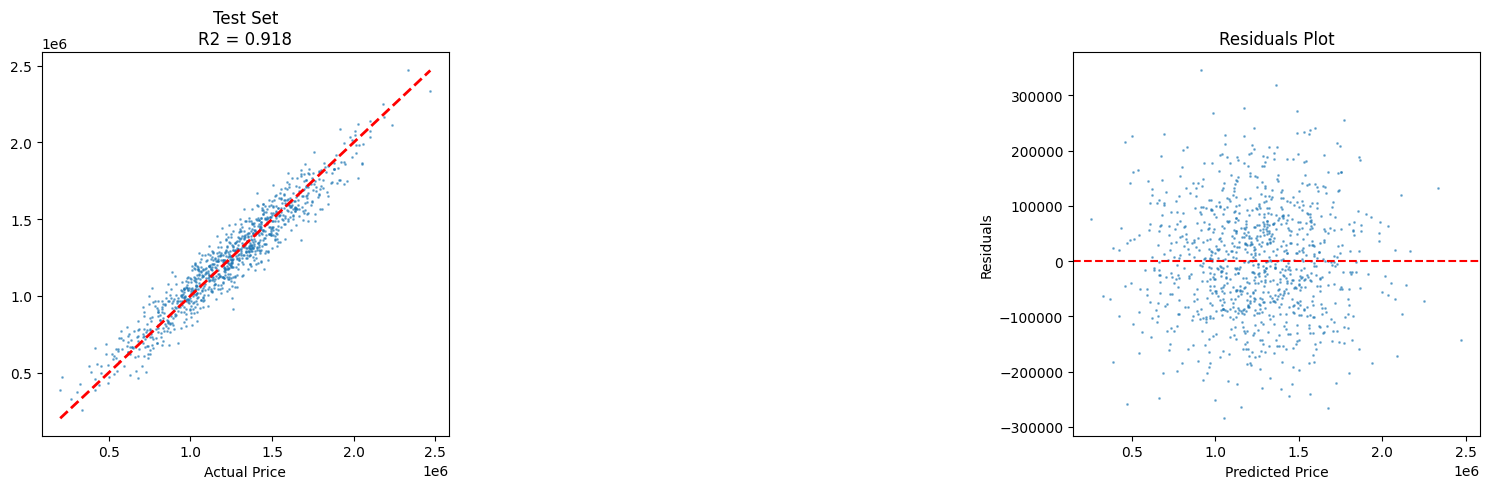

In [45]:
# Visulize Prediction vs actual value
plt.figure(figsize=(15, 5))

# Test set prediction
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_test_pred, alpha=0.5, s=1)
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.title(f"Test Set\nR2 = {test_r2:.3f}")

# Residuals plot
plt.subplot(1,3,3)
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, alpha=0.5, s=1)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot')

plt.tight_layout()
plt.show()

## **Model Testing**

## **Class prediction**

In [18]:
# Predict
y_pred = lin_reg.predict(X_test)
print(y_pred.shape)
print(y_pred)

(1000,)
[1308587.92699759 1237037.22949434 1243429.34030681 1228900.2136037
 1063320.9071083  1544058.05034861 1094774.70493019  833284.72339225
  788412.85578719 1469714.86615709  671728.43662062 1606818.21977961
 1004166.61331065 1796798.9759592  1288566.96221026 1087782.93301076
 1423072.37492533 1078178.68169677  802286.03537898  930761.0369571
 1134829.86477822  916398.42023144 1489972.69335433 1284580.15538816
 1582071.35322737 1132519.15991992 1089888.39644517  974510.51872155
  924057.96820648 1740759.72092282 1286481.59512311 1621289.95171608
 1435264.2016172  1234014.77924477 1485434.57300368 1718335.00753702
 1538953.74882858  777106.64791791 1765201.5224362  1175972.14199818
 1553707.94323485  897703.67505179 1371049.80326609  845281.72310359
 1201022.89803887 1133285.98450866 1363128.14557346 1449814.08768277
 1574363.90467358 1233577.50265968 1484464.01606216 1295276.58943552
 1222136.77335268  990124.416598   1693824.96035766 1823785.05665104
 1136495.63903364 1282164.40

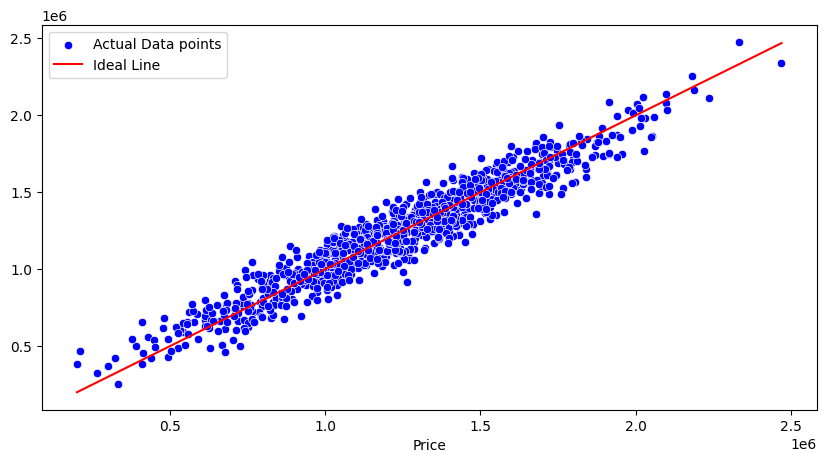

In [19]:
sns.scatterplot(x=y_test, y=y_pred, color='blue', label='Actual Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Ideal Line')
plt.legend()
plt.show()

In [20]:
# Combine actual and predicted values side by side
results = np.column_stack((y_test, y_pred))

# Printing the results
print("Actual Values  |  Predicted Values")
print("-----------------------------")
for actual, predicted in results:
    print(f"{actual:14.2f} |  {predicted:12.2f}")

Actual Values  |  Predicted Values
-----------------------------
    1339096.08 |    1308587.93
    1251794.18 |    1237037.23
    1340094.97 |    1243429.34
    1431507.62 |    1228900.21
    1042373.52 |    1063320.91
    1555320.50 |    1544058.05
    1250882.29 |    1094774.70
    1039380.72 |     833284.72
     832475.19 |     788412.86
    1420648.28 |    1469714.87
     613788.32 |     671728.44
    1702406.04 |    1606818.22
     913587.10 |    1004166.61
    1675557.27 |    1796798.98
    1279160.99 |    1288566.96
     949684.41 |    1087782.93
    1372994.29 |    1423072.37
    1148563.90 |    1078178.68
     846939.43 |     802286.04
    1002192.58 |     930761.04
    1072253.83 |    1134829.86
     973197.78 |     916398.42
    1538985.19 |    1489972.69
    1135079.35 |    1284580.16
    1618721.14 |    1582071.35
    1158742.83 |    1132519.16
    1268421.10 |    1089888.40
     985749.79 |     974510.52
     709348.22 |     924057.97
    1869313.11 |    1740759.72
    1

## **Residual Analysis**
Residual analysis in linear regression is a way to check how well the model fits the data. It involves looking at the differences (residuals) between the actual data points and the predictions from the model.

In a good model, the residuals should be randomly scattered around zero on a plot. If there are patterns or a fan-like shape, it suggests the model may not be the best fit. Outliers, points far from the others, can also affect the model.

Residual analysis helps ensure the model's accuracy and whether it meets the assumptions of linear regression. If issues are found, adjustments to the model may be needed to improve its performance.

In [21]:
residual = actual- y_pred.reshape(-1)
print(residual)

[-4.25440456e+05 -3.53889758e+05 -3.60281869e+05 -3.45752743e+05
 -1.80173436e+05 -6.60910579e+05 -2.11627234e+05  4.98627477e+04
  9.47346153e+04 -5.86567395e+05  2.11419034e+05 -7.23670749e+05
 -1.21019142e+05 -9.13651505e+05 -4.05419491e+05 -2.04635462e+05
 -5.39924904e+05 -1.95031211e+05  8.08614357e+04 -4.76135659e+04
 -2.51682394e+05 -3.32509492e+04 -6.06825222e+05 -4.01432684e+05
 -6.98923882e+05 -2.49371689e+05 -2.06740925e+05 -9.13630477e+04
 -4.09104972e+04 -8.57612250e+05 -4.03334124e+05 -7.38142481e+05
 -5.52116731e+05 -3.50867308e+05 -6.02287102e+05 -8.35187536e+05
 -6.55806278e+05  1.06040823e+05 -8.82054051e+05 -2.92824671e+05
 -6.70560472e+05 -1.45562040e+04 -4.87902332e+05  3.78657479e+04
 -3.17875427e+05 -2.50138513e+05 -4.79980675e+05 -5.66666617e+05
 -6.91216434e+05 -3.50430032e+05 -6.01316545e+05 -4.12129118e+05
 -3.38989302e+05 -1.06976946e+05 -8.10677489e+05 -9.40637586e+05
 -2.53348168e+05 -3.99016932e+05 -4.44144583e+05 -4.70208048e+05
 -8.31179724e+04  2.21240

<Axes: ylabel='Density'>

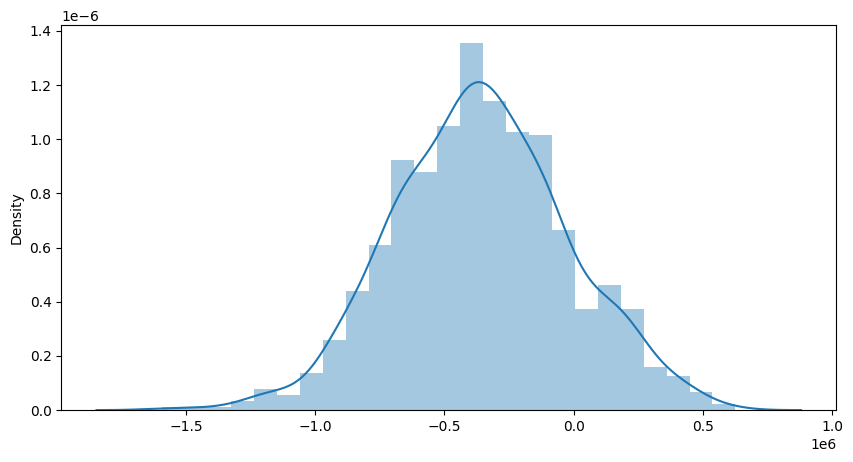

In [22]:
# Distribution plot for Residual (difference between actual and predicted values)
sns.distplot(residual, kde=True)

It represents that our mode is not skewed as the distribution is center aligned but note the values of the X and Y axis they in power of 6. Which means the difference between actual and predicted value was high and but it is reduced to some extent. Which is Good.

## **Model Evaluation**

# **Linear Regression**

In [23]:
# Score It
from sklearn.metrics import mean_squared_error

print('Linear Regression Model')
# Results
print('--'*30)
# mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression Model
------------------------------------------------------------
Mean Squared Error: 10089009300.894522
Root Mean Squared Error: 100444.06055558746


In [24]:
# Linear Regression Model
# ------------------------------------------------------------
# Mean Squared Error: 10100187858.864885
# Root Mean Squared Error: 100499.69083964829


# 10170939558

In [25]:
s = 10100187858 - 9839952411
print(s)

260235447


In [26]:
y_train.shape

(4000,)

## **Decision Tree**

In [27]:
rf_regressor = DecisionTreeRegressor()
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(X_test)

DTr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Decision Tree Regression : ',DTr)

Decision Tree Regression :  31568012111.933002


# **Random Forest**

In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(X_test)
RFr = mean_squared_error(y_pred_rf,y_test)
#Random Forest Regression Accuracy with test set
print('Random Forest Regression : ',RFr)

Random Forest Regression :  14457339987.854391


# **Gradient Boosting Regression**

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

rf_regressor = GradientBoostingRegressor()
rf_regressor.fit(X_train,y_train)

#Predicting the SalePrices using test set
y_pred_rf = rf_regressor.predict(X_test)

#Random Forest Regression Accuracy with test set
GBr = mean_squared_error(y_pred_rf,y_test)
print('Gradient Boosting Regression : ',GBr)

Gradient Boosting Regression :  11977166118.369093


In [31]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Linear Regression": 10089009300.894522,
    "Descison Tree": 31568012111.933002,
    "Random Forest":14457339987.854391,
    "Gradient Boosting": 11977166118.369093
}

# Sort the model scores in ascending order based on their values (lower values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1])

# Display the ranking of the models
print("Model Rankings (lower values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (lower values are better):
1. Linear Regression: 10089009300.894522
2. Gradient Boosting: 11977166118.369093
3. Random Forest: 14457339987.854391
4. Descison Tree: 31568012111.933002


# **Model Saving**

Now we'll save our trained model using pickle. This is crucial for development as we need to the exact same preprocessing steps during interface.

In [46]:
import pickle
# Savew the trained model using pickle
model_filename = 'linear_regression_model.pkl'
with open(model_filename, 'wb') as file:
   pickle.dump(model, file)
    
print(f"Trained model saved to {model_filename}")

# Save the Scaler as well as (very important for deployment)
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

print(f"Scaler saved to {scaler_filename}")

# Varify that we can load the model back
print("\nVarifying saved files...")
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

with open(scaler_filename, 'rb') as file:
    loaded_scaler = pickle.load(file)

print("Model and Scaler loaded successfully for Varification!")

# Test the loaded model with a sample prediction
sample_prediction = loaded_model.predict(X_test_scaled[:1])
print(f"\nSample prediction with loaded model: ${sample_prediction[0]*100:.0f}K")
print(f"Actual value for sample: ${y_test.iloc[0]*100:.0f}k")
print(f"Prediction error: ${sample_prediction[0]*100 - y_test.iloc[0]*100:.0f}K")




Trained model saved to linear_regression_model.pkl
Scaler saved to scaler.pkl

Varifying saved files...
Model and Scaler loaded successfully for Varification!

Sample prediction with loaded model: $130858793K
Actual value for sample: $133909608k
Prediction error: $-3050815K


# **9. Preparing for Deployment**

Now that we have our trained model and scaler saved, let's prepare some example data and test our result to ensre it's ready for deployment with FastAPI.

In [52]:
# Create example input data for testing the API 
example_house = {
    "MedInc": 5.0,  # Median income in block group
    "HouseAge": 20,  # Median House age in block grou
    "AveRooms": 6.0,  # Average number of rooms per household
    "AveBedrms": 2.0,  # Average number of bedrooms per household
    "AvePop": 1000  # Block group Population
}

print("Example house features for API testing:")
for feature, value in example_house.items():
    print(f"  {feature}: {value}")
    
# Test prediction with our example
example_array = np.array([[example_house[col]for col in x.columns]])
example_scaled = scaler.transform(example_array)
example_prediction = loaded_model.predict(example_scaled)[0]

print(f"\nPrediction house price: ${example_prediction*100:.0f}k")

#Save example data for API documentation
import json 
with open('example_input.json','w') as f:
    json.dump(example_house,f, indent=2)
print("Example input data saved to 'example_input.json'")


Example house features for API testing:
  MedInc: 5.0
  HouseAge: 20
  AveRooms: 6.0
  AveBedrms: 2.0
  AvePop: 1000

Prediction house price: $139626012k
Example input data saved to 'example_input.json'
